##  Importation des données

In [152]:
import pandas as pd
data1 = pd.read_table("german.data",delimiter=" ",header=None)
data1.columns = ['Status_Account', 'Duration', 'Credit_History', 'Purpose', 'Credit_Amount',
                     'Saving_Account', 'Present_employment', 'Installment', 'Personal_Status', 'Other',
                         'Residence', 'Property', 'Age', 'Other_Installment', 'Housing', 'Existing_Credits',
                             'Job', 'Liable_People', 'Telephone', 'Foreign_Worker', 'Actual_Score']
data2=data1

# I - Compréhension des données

In [153]:
#affichage des colonnes
data1.columns

Index(['Status_Account', 'Duration', 'Credit_History', 'Purpose',
       'Credit_Amount', 'Saving_Account', 'Present_employment', 'Installment',
       'Personal_Status', 'Other', 'Residence', 'Property', 'Age',
       'Other_Installment', 'Housing', 'Existing_Credits', 'Job',
       'Liable_People', 'Telephone', 'Foreign_Worker', 'Actual_Score'],
      dtype='object')

In [154]:
#Afficher les informations des données ( type de chaque colonne ainsi que la somme des lignes )
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Status_Account        1000 non-null object
Duration              1000 non-null int64
Credit_History        1000 non-null object
Purpose               1000 non-null object
Credit_Amount         1000 non-null int64
Saving_Account        1000 non-null object
Present_employment    1000 non-null object
Installment           1000 non-null int64
Personal_Status       1000 non-null object
Other                 1000 non-null object
Residence             1000 non-null int64
Property              1000 non-null object
Age                   1000 non-null int64
Other_Installment     1000 non-null object
Housing               1000 non-null object
Existing_Credits      1000 non-null int64
Job                   1000 non-null object
Liable_People         1000 non-null int64
Telephone             1000 non-null object
Foreign_Worker        1000 non-null object
Actual_Score          1000 non-null int64

In [155]:
#enlever la colonne téléphone 
data1=data1.drop(columns='Telephone')

In [156]:
#visualizer les cinq premières lignes des données
data1.head()

,Status_Account,Duration,Credit_History,Purpose,Credit_Amount,Saving_Account,Present_employment,Installment,Personal_Status,Other,Residence,Property,Age,Other_Installment,Housing,Existing_Credits,Job,Liable_People,Foreign_Worker,Actual_Score
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A201,2


In [159]:
data_quali.shape

(1000, 52)

# Visualisation des données 

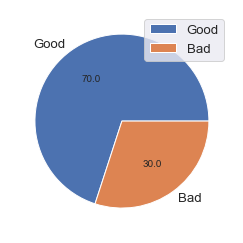

In [180]:
sizes=[data_num[data_num['Actual_Score']==1].count(),data_num[data_num['Actual_Score']==2].count()]
labels=[data_num.columns[7],data_num.columns[7]]
plt.pie(x=[sizes[0][7],sizes[1][7]], labels = ["Good","Bad"], autopct = "%.1f")
plt.legend()
plt.show()

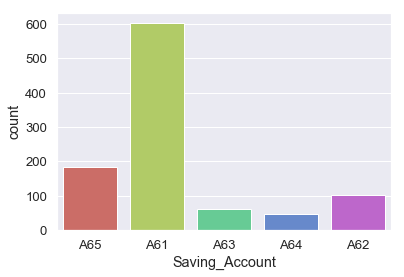

In [195]:
sns.countplot(x='Saving_Account',data=data1,palette='hls');
#A61 :          ... <  100 DM
#A62 :   100 <= ... <  500 DM
#63 :   500 <= ... < 1000 DM
#64 :          .. >= 1000 DM
#A65 :   unknown/ no savings account


#### Comme le montre cette pie-chart, on a 70% de bons clients et seulement 30% mauvais clients.

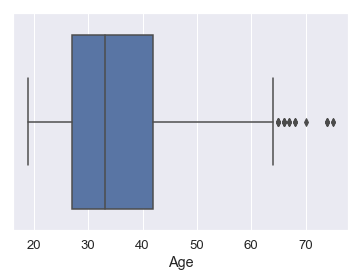

In [182]:
sns.boxplot(data_num.Age)

#### Distribution de l'age des clients entre 19 et 64 avec la présence des points abberants qui dépasse le maximum d'age. la médiane d'age est presque 33 ans.

<BarContainer object of 3 artists>

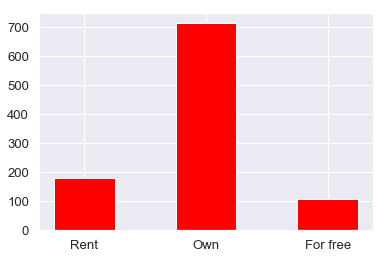

In [183]:
s=[data1[data1['Housing']=="A151"].count(),data1[data1['Housing']=="A152"].count(),data1[data1['Housing']=="A153"].count()]
l=[data1.columns[14],data1.columns[14],data1.columns[14]]
plt.bar(["Rent","Own","For free"],[s[0][14],s[1][14],s[2][14]],width = 0.5, color = 'red')

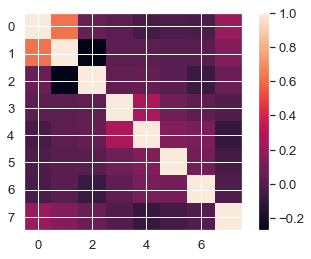

In [194]:
plt.imshow(data1.corr())
plt.colorbar();

#### Le type de logement chez la majorité des clients de la banque allemande est Own (700 qui possède du logement propres à eux) puis on trouve les locataires qui sont 180 et finalement seul 100 clients ont du logement gratuit.

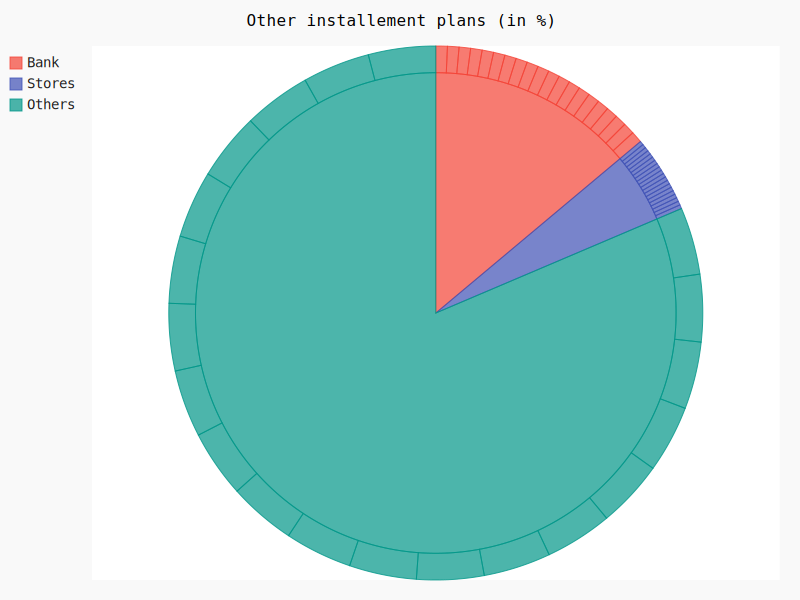

In [184]:
import pygal
from IPython.display import SVG, display
pie_chart = pygal.Pie()
pie_chart.title = 'Other installement plans (in %)'
pie_chart.add('Bank', data1[data1['Other_Installment']=="A141"].count())
pie_chart.add('Stores', data1[data1['Other_Installment']=="A142"].count())
pie_chart.add('Others', data1[data1['Other_Installment']=="A143"].count())
display(SVG(pie_chart.render(disable_xml_declaration=True)))

In [205]:
line_chart = pygal.Bar(width=1000,height=400)
line_chart.title = 'Property'
line_chart.add('Real estate', data1[data1['Property']=="A121"].count()[11])
line_chart.add('building society savings agreement/life insurance', data1[data1['Property']=="A122"].count()[11])
line_chart.add('car or other', data1[data1['Property']=="A123"].count()[11])
line_chart.add('unknown / no property',data1[data1['Property']=="A124"].count()[11])
display(SVG(line_chart.render_in_browser(disable_xml_declaration=True)))

file://C:/Users/Public/Documents/Wondershare/CreatorTemp/tmp34usmidt.html


<IPython.core.display.SVG object>

# II -Data Préparation 

In [157]:
#Traiement des variables qualitatives
data_quali = data1.select_dtypes(include=['object'])
data_quali_og = data1.select_dtypes(include=['object'])

In [158]:
#Encodage des variables qualitatives avec la méthode one hot 
for col in data_quali:
    onehot = pd.get_dummies(data_quali[col])
    data_quali = data_quali.drop(col,axis = 1)
    data_quali = data_quali.join(onehot)
data_quali

,A11,A12,A13,A14,A30,A31,A32,A33,A34,A40,...,A143,A151,A152,A153,A171,A172,A173,A174,A201,A202
0,1,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,1,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,...,1,0,0,1,0,0,1,0,1,0
5,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
6,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
7,0,1,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,1,0
8,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,1,0,0,1,0
9,0,1,0,0,0,0,0,0,1,1,...,1,0,1,0,0,0,0,1,1,0


In [56]:
#traitement des données quantitatives
# centrage et réduction
from sklearn.preprocessing import MinMaxScaler
data_num=data1._get_numeric_data()
scaler = MinMaxScaler()
data_num_reduced = pd.DataFrame(scaler.fit_transform(data_num), columns=data_num.columns)
data_num.head()

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.



,Duration,Credit_Amount,Installment,Residence,Age,Existing_Credits,Liable_People,Actual_Score
0,6,1169,4,4,67,2,1,1
1,48,5951,2,2,22,1,1,2
2,12,2096,2,3,49,1,2,1
3,42,7882,2,4,45,1,2,1
4,24,4870,3,4,53,2,2,2


In [160]:
#Concaténation des deux data 
data_german= pd.concat([data_num,data_quali], axis=1)

In [161]:
#Affichage des colonnes de data german complet
data_german.columns

Index(['Duration', 'Credit_Amount', 'Installment', 'Residence', 'Age',
       'Existing_Credits', 'Liable_People', 'Actual_Score', 'A11', 'A12',
       'A13', 'A14', 'A30', 'A31', 'A32', 'A33', 'A34', 'A40', 'A41', 'A410',
       'A42', 'A43', 'A44', 'A45', 'A46', 'A48', 'A49', 'A61', 'A62', 'A63',
       'A64', 'A65', 'A71', 'A72', 'A73', 'A74', 'A75', 'A91', 'A92', 'A93',
       'A94', 'A101', 'A102', 'A103', 'A121', 'A122', 'A123', 'A124', 'A141',
       'A142', 'A143', 'A151', 'A152', 'A153', 'A171', 'A172', 'A173', 'A174',
       'A201', 'A202'],
      dtype='object')

In [162]:
# voir les colonnes qui contiennent des valeurs NaN
data_german.isna().sum()

Duration            0
Credit_Amount       0
Installment         0
Residence           0
Age                 0
Existing_Credits    0
Liable_People       0
Actual_Score        0
A11                 0
A12                 0
A13                 0
A14                 0
A30                 0
A31                 0
A32                 0
A33                 0
A34                 0
A40                 0
A41                 0
A410                0
A42                 0
A43                 0
A44                 0
A45                 0
A46                 0
A48                 0
A49                 0
A61                 0
A62                 0
A63                 0
A64                 0
A65                 0
A71                 0
A72                 0
A73                 0
A74                 0
A75                 0
A91                 0
A92                 0
A93                 0
A94                 0
A101                0
A102                0
A103                0
A121                0
A122      

In [60]:
#description des données
data_german.describe()

,Duration,Credit_Amount,Installment,Residence,Age,Existing_Credits,Liable_People,Actual_Score,A11,A12,...,A143,A151,A152,A153,A171,A172,A173,A174,A201,A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000,0.274000,0.269000,...,0.814000,0.179000,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000,0.963000,0.037000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487,0.446232,0.443662,...,0.389301,0.383544,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278,0.188856,0.188856
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000


# III -Modélisation 

In [166]:
#Importation des bibliothèques qu'on a besoin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
#pour les methodes de scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#pour les methodes d'encodage
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#pour K-means
from sklearn.cluster import KMeans 
from sklearn.metrics.cluster import adjusted_rand_score
#pour CAH
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster,set_link_color_palette
from scipy.spatial.distance import pdist
#pour Apriori
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
#pour KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score# c'est 2 biblio sont utilisé aussi dans arbre de decision et random forest
#pour l'arbre de decision
from sklearn.tree import DecisionTreeClassifier
#pour random forest
from sklearn.ensemble import RandomForestClassifier
#pour la courbe ROC
from sklearn.metrics import roc_curve, auc

In [167]:
#Séparer la variable cible des données 
Y=data_german.iloc[:,7]
X_clustering=data_german.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59]].values

## Segmentation (Clustering)

## KMeans

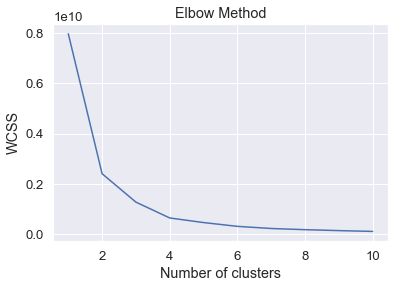

In [168]:
# KMeans
#methode d'Elbow(de coude) pour savoir le nb des clusters optimal

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


#### On constate alors qu'on va retenir deux clusters.

In [169]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X_clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [170]:
pd.crosstab(Y, kmeans.labels_)

col_0,0,1
Actual_Score,,
1,101,599
2,72,228


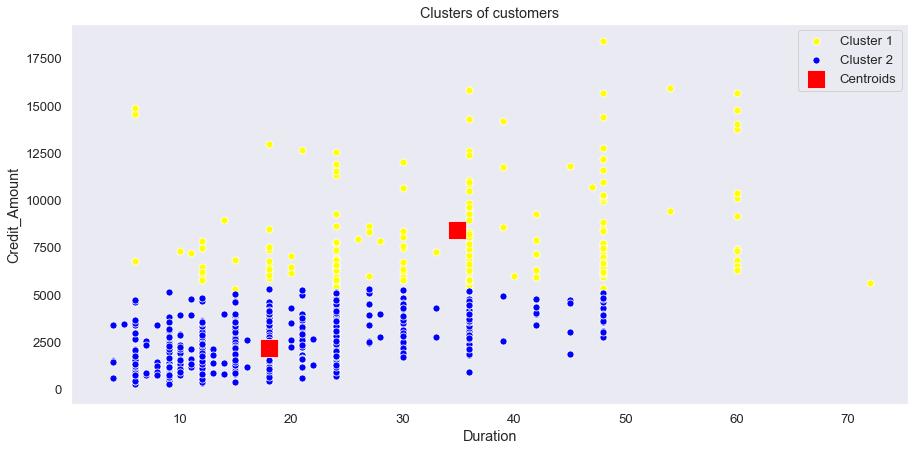

In [171]:
# Visualising the clusters
# Affichage du nuage des points qui indique la repartition de chaque cluster
plt.figure(figsize=(15,7))
import seaborn as sns
sns.scatterplot(X_clustering[ kmeans.labels_ == 0, 0], X_clustering[ kmeans.labels_ == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X_clustering[ kmeans.labels_ == 1, 0], X_clustering[ kmeans.labels_ == 1, 1], color = 'blue', label = 'Cluster 2',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Duration')
plt.ylabel('Credit_Amount')
plt.legend()
plt.show()

## Application de l'ACP 
### - Objectif : condenser l'information contenu dans les données par une analyse des corrélations linéaires entre les variables et une visualisation graphique des distances entre les individus. Elle nous permettra de dégager les liaisons entre variables et les ressemblances entre les clients de la banque.

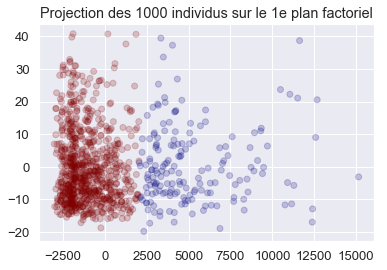

In [172]:
# application de l'ACP et visualisation des groupes
from sklearn import decomposition
clusters = kmeans.labels_
pca = decomposition.PCA(n_components = 2).fit(X_clustering)
data_projected = pca.transform(X_clustering)
plt.scatter(data_projected[:, 0], data_projected[:, 1], c = clusters.astype(np.float), cmap = 'jet', alpha = .2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(data_projected.shape[0]))
plt.show(block = False)

## Application d'une méthode de segmentation hiérarchique : CAH 

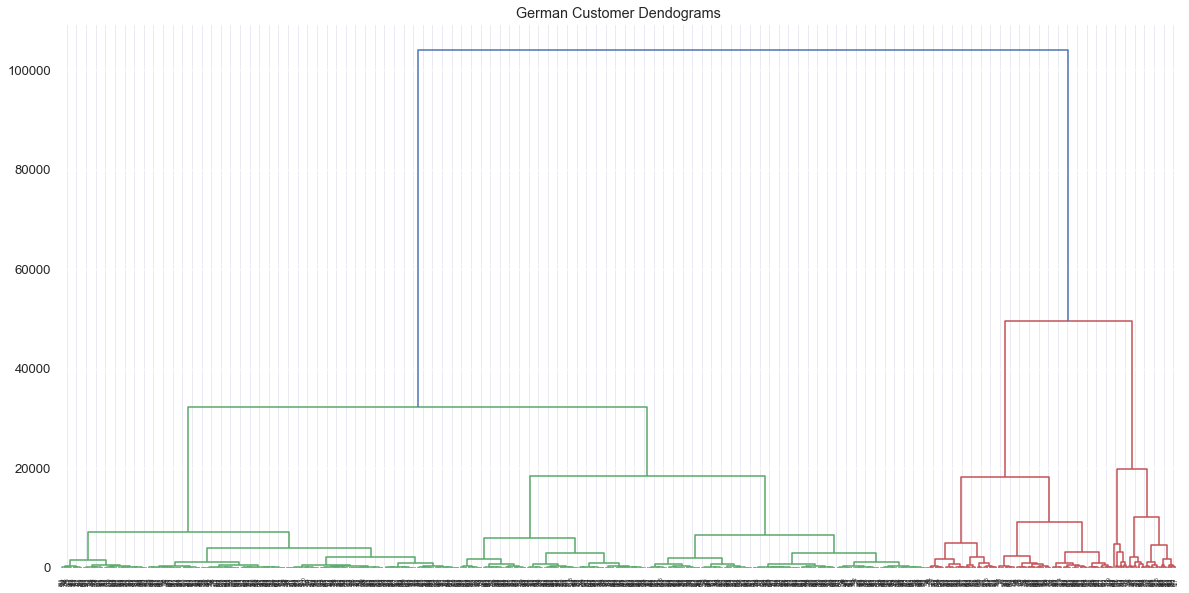

In [175]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

plt.figure(figsize=(20, 10))
plt.title("German Customer Dendograms")
#linkage : matrice des liens
link=linkage(X_clustering, method='ward')
dend = dendrogram(link)

In [176]:
# affichage des clusters donnés par l'algorithme
groupes_cah = fcluster(link,t=80000,criterion='distance') # découpage à t=800000 pour obtenir 2 clusters
print(groupes_cah)

[1 2 1 2 2 2 1 2 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 2
 1 1 1 1 1 2 2 2 1 1 1 2 1 1 2 1 1 1 1 2 2 1 2 1 1 1 2 1 2 1 1 1 1 2 1 1 2
 1 1 1 2 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 2 2 1 1
 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 1
 2 1 1 1 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1
 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 2 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 2 1 2 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 2 2 2 1 1 1 2 2 2 2 2
 2 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2
 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 2 2 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 

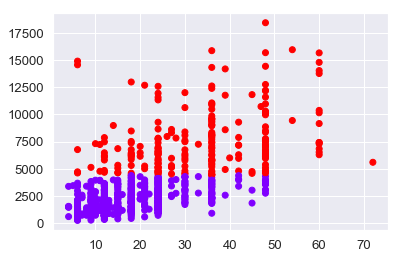

In [177]:
#projeter les individus de chaques cluster sur les deux premiers attribus : Credit_Amount et duration 
plt.scatter(X_clustering[:,0], X_clustering[:,1], c=groupes_cah, cmap='rainbow')

## Application de l'algorithme DBSCAN

In [178]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
import numpy as np


Estimated number of clusters: 2
Estimated number of noise points: 18
Homogeneity: 0.976
Completeness: 0.857
V-measure: 0.913
Adjusted Rand Index: 0.953
Adjusted Mutual Information: 0.857
Silhouette Coefficient: 0.647


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



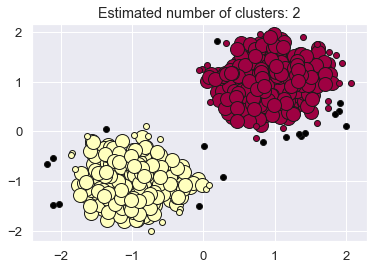

In [179]:

centers = [[1, 1], [-1, -1]]

# #############################################################################
# Generate sample data

X_clustering, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)



# #############################################################################
# Compute DBSCAN
model = DBSCAN(eps=0.3, min_samples=10).fit(X_clustering)
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
labels = model.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_clustering, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_clustering[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_clustering[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Le graphe de DBSCAN construit  deux clusters dont chacun présente des profils similaires des clients. Les points noires représentent les point bruit qui sont réellement les point abberantes c'est à dire les clients qui ont un comportement bizarre par rapport aux autres clients qui appartiennent aux deux segments

# Classification des clients

In [75]:
data1.columns

Index(['Status_Account', 'Duration', 'Credit_History', 'Purpose',
       'Credit_Amount', 'Saving_Account', 'Present_employment', 'Installment',
       'Personal_Status', 'Other', 'Residence', 'Property', 'Age',
       'Other_Installment', 'Housing', 'Existing_Credits', 'Job',
       'Liable_People', 'Foreign_Worker', 'Actual_Score'],
      dtype='object')

In [76]:
#Séparation de la variable cible des données
Y=data_german.iloc[:,7]
X=data_german.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59]].values

In [77]:
# Echantiollange aléatoires des données (Split data)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
# Centrage et réduction des données 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



Text(0, 0.5, 'Erreur')

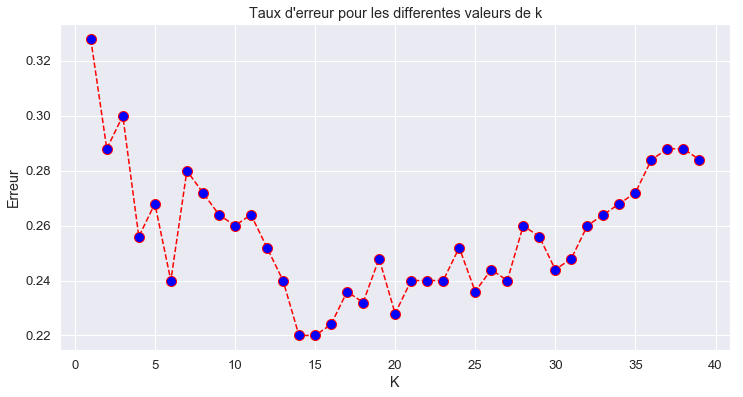

In [78]:
# determine le K optimal on se basant sur la methode d'evaluation d'apprentissage Test set validation (holdout method)
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, Y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux d\'erreur pour les differentes valeurs de k')
plt.xlabel('K')
plt.ylabel('Erreur')

In [79]:
knn = KNeighborsClassifier(15)
knn_model = knn.fit(X_train, Y_train)
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1], dtype=int64)

In [80]:
print("confusion matrix : ")
print(confusion_matrix(Y_test, y_pred_knn))  
print(classification_report(Y_test, y_pred_knn)) 
print("Accuracy score is : " , accuracy_score(Y_test, y_pred_knn))

confusion matrix : 
[[165  11]
 [ 44  30]]
              precision    recall  f1-score   support

           1       0.79      0.94      0.86       176
           2       0.73      0.41      0.52        74

   micro avg       0.78      0.78      0.78       250
   macro avg       0.76      0.67      0.69       250
weighted avg       0.77      0.78      0.76       250

Accuracy score is :  0.78


### sur 209(165+44) client ayant un score égale à 1 (positive) 165 sont predit correctement(VP) et 44 ne sont pas predit correctement(FN)
### sur 41(30+11) client ayant un score égale à 2 (negative) 30 sont predit correctement(VN) et 11 ne sont pas predit correctement(FP)

Text(0.5, 0, 'False Positive ')

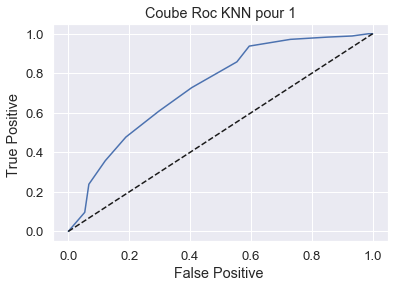

In [81]:
from sklearn.metrics import roc_curve
proba_knn = knn_model.fit(X_train,Y_train).predict_proba(X_test)
preds_knn  = proba_knn[:,0]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, preds_knn, pos_label=1)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Coube Roc KNN pour 1')
plt.ylabel('True Positive ')
plt.xlabel('False Positive ')

## Decision Tree 

In [82]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, Y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [83]:
print("confusion matrix : ")
print(confusion_matrix(Y_test, y_pred_dtc))  
print(classification_report(Y_test, y_pred_dtc)) 
print("Accuracy score is : " , accuracy_score(Y_test, y_pred_dtc))

confusion matrix : 
[[129  47]
 [ 32  42]]
              precision    recall  f1-score   support

           1       0.80      0.73      0.77       176
           2       0.47      0.57      0.52        74

   micro avg       0.68      0.68      0.68       250
   macro avg       0.64      0.65      0.64       250
weighted avg       0.70      0.68      0.69       250

Accuracy score is :  0.684


### sur 159(127+32) clients ayant un score égale à 1 (positive) 127 sont predit correctement(VP) et 32 ne sont pas predit correctement(FN)
### sur 91(49+42) client ayant un score égale à 2 (negative) 42 sont predit correctement(VN) et 49 ne sont pas predit correctement(FP)


Text(0.5, 0, 'False Positive ')

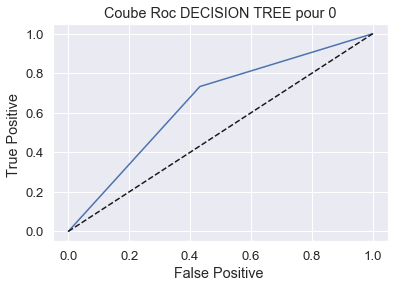

In [84]:
proba_tree = dtc_model.predict_proba(X_test)
preds_tree = proba_tree[:,0]
fprr, tprr, threshold = metrics.roc_curve(Y_test, preds_tree, pos_label=1)
plt.plot(fprr, tprr)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Coube Roc DECISION TREE pour 0')
plt.ylabel('True Positive ')
plt.xlabel('False Positive ')

## Random Forest 

In [85]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier(n_estimators=10).fit(X_train, Y_train)
y_pred_RF=Rf.predict(X_test)

In [86]:
print("confusion matrix : ")
print(confusion_matrix(Y_test, y_pred_RF))  
print(classification_report(Y_test, y_pred_RF)) 
print("Accuracy score is : " , accuracy_score(Y_test, y_pred_RF))

confusion matrix : 
[[158  18]
 [ 48  26]]
              precision    recall  f1-score   support

           1       0.77      0.90      0.83       176
           2       0.59      0.35      0.44        74

   micro avg       0.74      0.74      0.74       250
   macro avg       0.68      0.62      0.63       250
weighted avg       0.71      0.74      0.71       250

Accuracy score is :  0.736


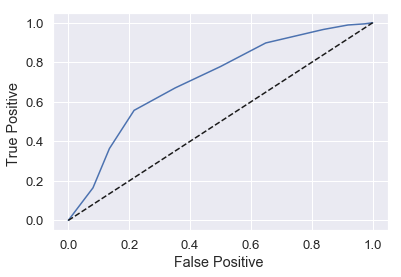

In [87]:
proba_Rf  = Rf.predict_proba(X_test)
preds_Rf   = proba_Rf[:,0]
fprrr, tprrr, threshold = metrics.roc_curve(Y_test, preds_Rf, pos_label=1)
plt.plot(fprrr,tprrr)
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel('True Positive ')
plt.xlabel('False Positive ')
plt.show()

## Regression Linéaire

In [88]:
from sklearn import linear_model, datasets
from sklearn.metrics import accuracy_score
modele_regression_logistique = linear_model. LogisticRegression ()
model_regression= modele_regression_logistique.fit(X_train, Y_train)
y_pred_reg=model_regression.predict(X_test)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [89]:
print(classification_report(Y_test, y_pred_reg))

              precision    recall  f1-score   support

           1       0.80      0.83      0.81       176
           2       0.55      0.50      0.52        74

   micro avg       0.73      0.73      0.73       250
   macro avg       0.68      0.66      0.67       250
weighted avg       0.73      0.73      0.73       250



In [90]:
print("accuracy score is : " ,accuracy_score(Y_test,y_pred_reg))
print("confusion matrix : ")
print(confusion_matrix(Y_test, y_pred_reg))

accuracy score is :  0.732
confusion matrix : 
[[146  30]
 [ 37  37]]


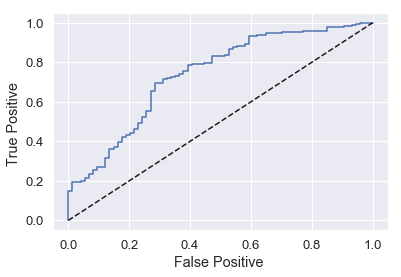

In [91]:
proba_reg  = model_regression.predict_proba(X_test)
preds_Reg  = proba_reg[:,0]
fp4r, tp4r, threshold = metrics.roc_curve(Y_test, preds_Reg, pos_label=1)
plt.plot(fp4r,tp4r)
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel('True Positive ')
plt.xlabel('False Positive ')
plt.show()

## Support Vector Machine

In [92]:
from sklearn import svm

In [93]:
model_svm=svm.SVC(kernel='linear',gamma='scale',probability=True).fit(X_train,Y_train)
y_pred_svm=model_svm.predict(X_test)

In [94]:
print(classification_report(Y_test, y_pred_svm))

              precision    recall  f1-score   support

           1       0.79      0.82      0.81       176
           2       0.53      0.47      0.50        74

   micro avg       0.72      0.72      0.72       250
   macro avg       0.66      0.65      0.65       250
weighted avg       0.71      0.72      0.72       250



In [95]:
print("accuracy score is : " ,accuracy_score(Y_test,y_pred_svm))
print("confusion matrix : ")
print(confusion_matrix(Y_test, y_pred_svm))

accuracy score is :  0.72
confusion matrix : 
[[145  31]
 [ 39  35]]


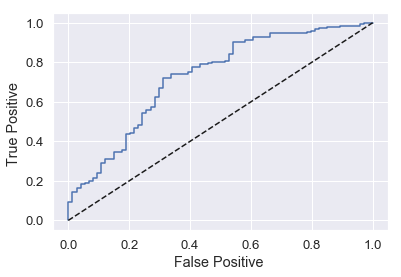

In [96]:
proba_svm  = model_svm.predict_proba(X_test)
preds_svm  = proba_svm[:,0]
fp5r, tp5r, threshold = metrics.roc_curve(Y_test, preds_svm, pos_label=1)
plt.plot(fp5r,tp5r)
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel('True Positive ')
plt.xlabel('False Positive ')
plt.show()

# Comparaison des cinq algorithmes de prédiction 

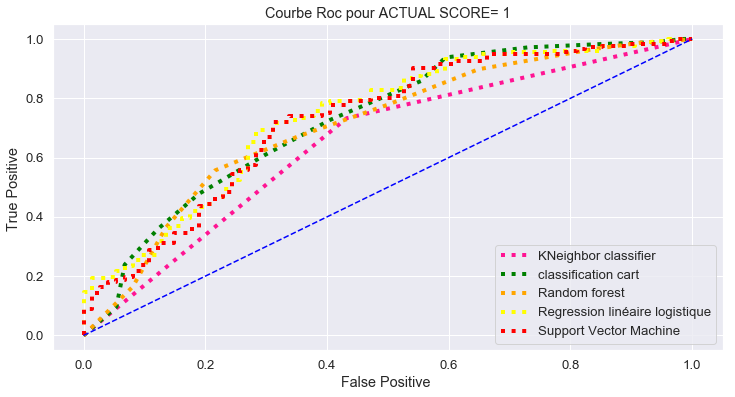

In [202]:
plt.figure(figsize=(12, 6))
plt.title('Courbe Roc pour ACTUAL SCORE= 1')
plt.plot(fprr,tprr, color='deeppink', linestyle=':', label='KNeighbor classifier', linewidth=4)
plt.plot(fpr,tpr, color='green', linestyle=':',label='classification cart' , linewidth=4)
plt.plot(fprrr,tprrr, color='orange', linestyle=':', label='Random forest', linewidth=4)
plt.plot(fp4r,tp4r, color='yellow', linestyle=':',label='Regression linéaire logistique', linewidth=4)
plt.plot(fp5r,tp5r, color='red', linestyle=':', label='Support Vector Machine', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', color="blue")
plt.ylabel('True Positive ')
plt.xlabel('False Positive ')
plt.legend(loc = "lower right")
plt.show()

## - Prise de Décision :

### D'après la projection des courbes Roc de chaque algorithme on peut constater que le meilleur algorithme est KNN ( augment plus rapidement à 1 ayant plus de vraies positives et vraies négatives ) . Ce qui est vérifié aussi par les accuracy scores de chacun.

# IIII - Déploiement

### Web Application : Dashboard Prédiction German Bank

In [107]:
import dash
import plotly.offline as pyo
import plotly.graph_objs as go
#import dash_bootstrap_components as dbc
import dash_html_components as html
import seaborn as sns; sns.set(font_scale=1.2)
import plotly.graph_objs as go
import dash_core_components as dcc
from dash.dependencies import Input, Output

In [190]:
#Encodage (LabelEncoder)

In [109]:
from sklearn.preprocessing import LabelEncoder

In [111]:
labelEncoder1 = LabelEncoder()
Status_Account = labelEncoder1.fit_transform(data2["Status_Account"].values)
labelEncoder2 = LabelEncoder()
Credit_History = labelEncoder2.fit_transform(data2["Credit_History"].values)
labelEncoder3 = LabelEncoder()
Purpose = labelEncoder3.fit_transform(data2["Purpose"].values)
labelEncoder4= LabelEncoder()
Saving_Account = labelEncoder4.fit_transform(data2["Saving_Account"].values)
labelEncoder5 = LabelEncoder()
Present_employment = labelEncoder5.fit_transform(data2["Present_employment"].values)
labelEncoder6 = LabelEncoder()
Personal_Status = labelEncoder6.fit_transform(data2["Personal_Status"].values)
labelEncoder7 = LabelEncoder()
Other = labelEncoder7.fit_transform(data2["Other"].values)
labelEncoder8 = LabelEncoder()
Property = labelEncoder8.fit_transform(data2["Property"].values)
labelEncoder9 = LabelEncoder()
Other_Installment = labelEncoder9.fit_transform(data2["Other_Installment"].values)
labelEncoder10 = LabelEncoder()
Housing  = labelEncoder10.fit_transform(data2["Housing"].values)
labelEncoder11= LabelEncoder()
Job = labelEncoder11.fit_transform(data2["Job"].values)
labelEncoder12 = LabelEncoder()
Telephone = labelEncoder12.fit_transform(data2["Telephone"].values)
labelEncoder13 = LabelEncoder()
Foreign_Worker = labelEncoder13.fit_transform(data2["Foreign_Worker"].values)

In [112]:
data2["Status_Account"]=Status_Account
data2["Credit_History"]=Credit_History
data2["Purpose"]=Purpose
data2["Saving_Account"]=Saving_Account
data2["Present_employment"]=Present_employment
data2["Personal_Status"]=Personal_Status
data2["Other"]=Other
data2["Property"]=Property
data2["Other_Installment"]=Other_Installment
data2["Housing"]=Housing
data2["Job"]=Job
data2["Telephone"]=Telephone
data2["Foreign_Worker"]=Foreign_Worker

In [113]:
Actual_Score=data1.Actual_Score
data2.drop("Actual_Score",axis=1,inplace=True)
data2["Actual_Score"]=Actual_Score

In [114]:
data2.head()

,Status_Account,Duration,Credit_History,Purpose,Credit_Amount,Saving_Account,Present_employment,Installment,Personal_Status,Other,...,Property,Age,Other_Installment,Housing,Existing_Credits,Job,Liable_People,Telephone,Foreign_Worker,Actual_Score
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2


In [115]:
X2=data2.iloc[:,:-1]
Y2=data2.iloc[:,-1]

In [116]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, random_state=0)

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(X_train2)

X_trainK = scaler.transform(X_train2)  
X_testK = scaler.transform(X_test2)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int32, int64 were all converted to float64 by StandardScaler.

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

Data with input dtype int32, int64 were all converted to float64 by StandardScaler.

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning:

Data with input dtype int32, int64 were all converted to float64 by StandardScaler.



In [118]:
from sklearn.neighbors import KNeighborsClassifier  
classifierK = KNeighborsClassifier(n_neighbors=2)  
classifierK.fit(X_trainK, y_train2) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [119]:
y_predK = classifierK.predict(X_testK)

In [120]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [121]:
print(confusion_matrix(y_test2, y_predK))  
print(classification_report(y_test2, y_predK))
metrics.accuracy_score(y_test2,y_predK)

[[165  11]
 [ 59  15]]
              precision    recall  f1-score   support

           1       0.74      0.94      0.83       176
           2       0.58      0.20      0.30        74

   micro avg       0.72      0.72      0.72       250
   macro avg       0.66      0.57      0.56       250
weighted avg       0.69      0.72      0.67       250



0.72

In [204]:
#Dash 
external_stylesheets = [
    'https://codepen.io/chriddyp/pen/bWLwgP.css',
    {
        'href': 'https://stackpath.bootstrapcdn.com/bootstrap/4.1.3/css/bootstrap.min.css',
        'rel': 'stylesheet',
        'integrity': 'sha384-MCw98/SFnGE8fJT3GXwEOngsV7Zt27NXFoaoApmYm81iuXoPkFOJwJ8ERdknLPMO',
        'crossorigin': 'anonymous'
    }
]
app = dash.Dash(external_stylesheets=external_stylesheets)

In [143]:
app.title="Prediction and Dashboard Web App"

In [185]:
i=100000

In [186]:
i=i+1
chh=str(i)
Tab1 = dcc.Tab(label='Prediction', children=[
     html.Div(     style = {
                "position": "relative",
                  "top": "50px",
                 'left' : '40px'
     }   ,
         children =
     [
         html.Label("Status_Account"),
         html.Br(),
         dcc.Dropdown(
            id='input1',
            options=[
                {'label': 'status < 0 DM', 'value': '0'},
                {'label': '0 < status < 200 DM', 'value': '1'},
                {'label': 'Status >=200 DM', 'value': '2'},
                {'label': 'no checking account', 'value': '3'},
            ],
            style={"width" : "300px"},
        ),
         html.Label("Credit_History"),
         html.Br(),
         dcc.Dropdown(
            id='input3',
            options=[
                {'label': 'no credits taken/all credits paid back duly', 'value': '0'},
                {'label': 'all credits at this bank paid back duly', 'value': '1'},
                {'label': 'existing credits paid back duly till now', 'value': '2'},
                {'label': 'delay in paying off in the past', 'value': '3'},
                {'label': 'critical account/other credits existing', 'value': '4'}
            ],
            style={"width" : "300px"},
        ),
         html.Label("Saving_Account"),
         html.Br(),         
        dcc.Dropdown(
            id='input6',
            options=[
                {'label': 'Saving_Account < 100 DM', 'value': '0'},
                {'label': '100 <= Saving_Account <  500 DM', 'value': '1'},
                {'label': '500 <= Saving_Account < 1000 DM', 'value': '2'},
                {'label': ' Saving_Account >= 1000 DM', 'value': '3'},
                {'label': 'unknown/ no savings account', 'value': '4'}
            ],
            style={"width" : "300px"},
        ),
         html.Label("Purpose"),
         html.Br(),  
         dcc.Dropdown(
            id='input4',
            options=[
                {'label': 'car new', 'value': '0'},
                {'label': 'car used', 'value': '1'},
                {'label': 'furniture/equipment', 'value': '2'},
                {'label': 'radio/television', 'value': '3'},
                {'label': 'domestic appliances', 'value': '4'},
                {'label': 'repairs', 'value': '5'},
                {'label': 'education', 'value': '6'},
                {'label': 'vacation - does not exist?', 'value': '7'},
                {'label': 'retraining', 'value': '8'},
                {'label': 'business', 'value': '9'},
                {'label': 'others', 'value': '10'}
            ],
            style={"width" : "300px"},
        ),
         html.Label("Present_employment"),
         html.Br(),
         dcc.Dropdown(
            id='input7',
            options=[
                {'label': 'unemployed', 'value': '0'},
                {'label': '< 1 year', 'value': '1'},
                {'label': '1  <= Present_employment < 4 years  ', 'value': '2'},
                {'label': '4  <= Present_employment < 7 years', 'value': '3'},
                {'label': ' Present_employment >= 7 years', 'value': '4'}
            ],
            style={"width" : "300px"},
        ),
        html.Label("Personal_Status_Sex"),
         html.Br(),
         dcc.Dropdown(
            id='input9',
            options=[
                {'label': 'male : divorced/separated', 'value': '0'},
                {'label': 'female : divorced/separated/married', 'value': '1'},
                {'label': 'male : single', 'value': '2'},
                {'label': 'male: married/widowed', 'value': '3'},
                {'label': 'female : single', 'value': '4'}
             ],
            style={"width" : "300px"},
        ),
        html.Label("Other debtors / guarantors"),
         html.Br(),
        dcc.Dropdown(
            id='input10',
            options=[
                {'label': 'none', 'value': '0 '},
                {'label': 'co-applicant', 'value': '1 '},
                {'label': 'guarantor', 'value': '2'},
             ],
            style={"width" : "300px"},
        ),
        html.Label("Property"),
         html.Br(),
        dcc.Dropdown(
            id='input12',
            options=[
                {'label': 'real estate', 'value': '0'},
                {'label': 'building society savings agreement/life insurance', 'value': '1'},
                {'label': 'car or other ', 'value': '2'},
                {'label': 'unknown / no property', 'value': '3'}
            ],
            style={"width" : "300px"},
        ),
          html.Label("Other installment plans "),
         html.Br(),
        dcc.Dropdown(
            id='input14',
            options=[
                {'label': 'bank', 'value': '0'},
                {'label': 'stores', 'value': '1'},
                {'label': 'none', 'value': '2'}
            ],
            style={"width" : "300px"},
        ),
        
         
        

         
     ]),
##############################################################################################################################################   
     html.Div(style={
                  "position": "relative",
                  "left": "550px",
                  "top": "-450px",
                  
                  
                  },children =
     [   
         html.Label("Housing"), 
         html.Br(), 
         dcc.Dropdown( id='input15', 
                      options=[ 
                        {'label': 'rent', 'value': '0'}, 
                        {'label': 'own', 'value': '1'}, 
                        {'label': 'for free', 'value': '2'} ], 
                      style={"width" : "300px"}, ),
         
         html.Label("Job"), 
         html.Br(), 
         dcc.Dropdown( id='input17', 
                      options=[ 
                          {'label': 'unemployed/ unskilled  - non-resident', 'value': '0'}, 
                          {'label': 'unskilled - resident', 'value': '1'}, 
                          {'label': 'skilled employee / official', 'value': '2'}, 
                          {'label': 'management/ self-employed/highly qualified employee/ officer', 'value': '3'} ],
                      style={"width" : "300px"}, ), 
         html.Label("Telephone"), 
         html.Br(), 
         dcc.Dropdown( id='input19', 
                      options=[ 
                          {'label': 'none', 'value': '0'}, 
                          {'label': 'yes, registered under the customers name', 'value': '1'}, ], 
                      style={"width" : "300px"}, ), 
       html.Label("foreign worker"), 
         html.Br(), 
         dcc.Dropdown( id='input20', 
                      options=[ 
                          {'label': 'yes', 'value': '0'}, 
                          {'label': 'no, registered under the customers name', 'value': '1'}, ], 
                      style={"width" : "300px"}, ),
         html.Label("Duration : ",style={'margin-right' : '167px'}),
         
         html.Br(),
         dcc.Input(
            id="input2", style={'margin-right' : '35px' , 'width':'300px'} ,
            placeholder="Duration",
        ),
         html.Br(),
        html.Label("Installement : ",style={'margin-right' : '167px'}),
         
         html.Br(),
         dcc.Input(
            id="input8", style={'margin-right' : '35px' , 'width':'300px'} ,
            placeholder="Installement",
        ),
        

     ]),
     html.Div(style={
                  "position": "relative",
                  "left": "550px",
                  "top": "-450px",
                  
                  
                  },children=[
          html.Label("Credit amount : ",style={'margin-right' : '300px'}),            
          html.Br(),
           dcc.Input(
            id="input5", style={'margin-right' : '35px','width' : '300px'} ,
            placeholder="Credit amount",
        ),
         html.Br(),
        html.Label("Residence : ",style={'margin-right' : '300px'}),
         html.Br(),
        
         
        
            dcc.Input(
            id="input11", style={'margin-right' : '35px' , 'width':'300px'} ,
            placeholder="Residence"),
         html.Br(),
         html.Label("Number of existing credits at this bank  : "),
         html.Br(),
         dcc.Input(
            id="input16", style={'margin-right' : '35px' , 'width':'300px'} ,
            placeholder="Age in years"),
         html.Br(),
         html.Label("Age in years   : ",style={'margin-right' : '300px'}),
        html.Br(),
        dcc.Input(
            id="input13", style={'margin-right' : '35px' , 'width':'300px'} ,
            placeholder="Age in years "),
         html.Br(),
         html.Label("People being liable to maintein  : "),
         html.Br(),
         dcc.Input(
            id="input18", style={'margin-right' : '35px' , 'width':'300px'} ,
            placeholder="People being liable to maintein "),
         
                ]
    ),
        html.Div(id=chh ,      style={
                  "position": "relative",
                  "left": "900px",
                  "top": "-800px",
                  'font-size': '40px'
                  
                  },children=[
                ]
    )

])

In [187]:
colors = {
    'background': '#5CDB95',
    'text': '#05386B'
}

app.layout = html.Div( children=[
    html.Div(style={'backgroundColor': colors['background']} ,children = [
    html.H1(
        children='Application Web Bank of German',
        style={
            'textAlign': 'center',
            'color': colors['text'],
        }
    ),

    html.Div(children='For a good prediction and awesome dashboards', style={
        'textAlign': 'center',
        'color': colors['text']
    })]),
    dcc.Tabs([
        Tab1,
        
    ])

])

In [188]:

@app.callback(
    Output(chh, 'children'),
   [Input('input1', 'value'),Input('input2', 'value'),Input('input3', 'value'),
    Input('input4', 'value'),Input('input5', 'value'),Input('input6', 'value'),
    Input('input7', 'value'),Input('input8', 'value'),Input('input9', 'value'),
    Input('input10', 'value'),Input('input11', 'value'),Input('input12', 'value'),
    Input('input13', 'value'),Input('input14', 'value'),Input('input15', 'value'),
    Input('input16', 'value'),Input('input17', 'value'),Input('input18', 'value'),
    Input('input19', 'value'),Input('input20', 'value')
  ]
)
def pass_onmodel(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20):
    if(x1!=None and x1!=None and x2!=None  and x3!=None and x4!=None and x5!=None and x6!=None and x7!=None and x8!=None and x9!=None and x10!=None 
       and x11!=None and x12!=None and x13!=None and x14!=None and x15!=None and x16!=None and x17!=None  and x18!=None 
      and x19!=None and x20!=None) :
        
        new_customer = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20]
        new_cus = [int(i) for i in new_customer]
        new = [new_cus]
        y_pred = classifierK.predict(new)
        print(y_pred)
        if(y_pred[0]==1):
            ch = "Good Customer he will pay "
            color = 'MediumSeaGreen '
        else :
            ch = "Bad Customer he won't pay"
            color = 'Tomato'
    return html.P(ch,style = {'color':color})


In [189]:
app.run_server()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [21/Jan/2020 01:26:25] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Jan/2020 01:26:26] "GET /_dash-component-suites/dash_renderer/react@16.8.6.min.js?v=1.1.2&m=1571388923 HTTP/1.1" 200 -
127.0.0.1 - - [21/Jan/2020 01:26:26] "GET /_dash-component-suites/dash_renderer/prop-types@15.7.2.min.js?v=1.1.2&m=1571388923 HTTP/1.1" 200 -
127.0.0.1 - - [21/Jan/2020 01:26:26] "GET /_dash-component-suites/dash_renderer/react-dom@16.8.6.min.js?v=1.1.2&m=1571388923 HTTP/1.1" 200 -
127.0.0.1 - - [21/Jan/2020 01:26:26] "GET /_dash-component-suites/dash_html_components/dash_html_components.min.js?v=1.0.1&m=1571388932 HTTP/1.1" 200 -
127.0.0.1 - - [21/Jan/2020 01:26:26] "GET /_dash-component-suites/dash_core_components/highlight.pack.js?v=1.3.1&m=1571388927 HTTP/1.1" 200 -
127.0.0.1 - - [21/Jan/2020 01:26:26] "GET /_dash-component-suites/dash_renderer/dash_renderer.min.js?v=1.1.2&m=1571388923 HTTP/1.1" 200 -
127.0.0.1 - - [21/Jan/2020 0

[2]


[2020-01-21 01:32:12,631] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\Asus\Anaconda3\lib\site-packages\flask\app.py", line 2292, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Asus\Anaconda3\lib\site-packages\flask\app.py", line 1815, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Asus\Anaconda3\lib\site-packages\flask\app.py", line 1718, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\Asus\Anaconda3\lib\site-packages\flask\_compat.py", line 35, in reraise
    raise value
  File "C:\Users\Asus\Anaconda3\lib\site-packages\flask\app.py", line 1813, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Asus\Anaconda3\lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\Asus\Anaconda3\lib\site-packages\dash\dash.py", line 137

[2]
